# Introduction to regression with neural network using tensorflow

There are many definitions for a regression problem but in our case, we're going to simplify it to be: predicting a number.

For example, you might want to:

* Predict the selling price of houses given information about them (such as number of rooms, size, number of bathrooms).
* Predict the coordinates of a bounding box of an item in an image.
* Predict the cost of medical insurance for an individual given their demographics (age, sex, gender, race).

In this notebook, we're going to set the foundations for how you can take a sample of inputs (this is your data), build a neural network to discover patterns in those inputs and then make a prediction (in the form of a number) based on those inputs.

## What we're going to cover
Specifically, we're going to go through doing the following with TensorFlow:

* Architecture of a regression model
* Input shapes and output shapes
  * X: features/data (inputs)
  * y: labels (outputs)
* Creating custom data to view and fit
* Steps in modelling
  * Creating a model
  * Compiling a model
    * Defining a loss function
    * Setting up an optimizer
    * Creating evaluation metrics
  * Fitting a model (getting it to find patterns in our data)
* Evaluating a model
  * Visualizng the model ("visualize, visualize, visualize")
  * Looking at training curves
  * Compare predictions to ground truth (using our evaluation metrics)
* Saving a model (so we can use it later)
* Loading a model

In [1]:
import tensorflow as tf
print(tf.__version__)

2.11.0


## Creating data view and fit

In [2]:
import numpy as np 
import matplotlib.pyplot as plt

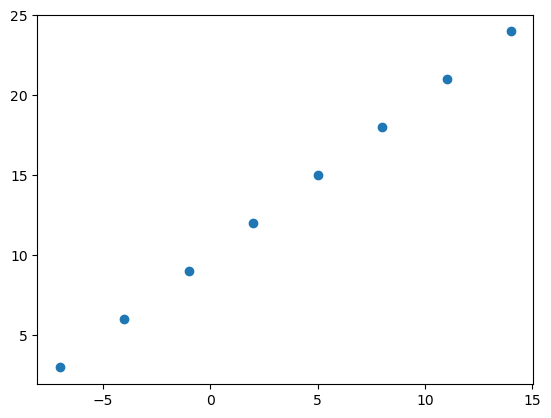

In [3]:
# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y);

## Input and output shapes

In [4]:
# Example input and output shapes of a regresson model
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700])>)

In [5]:
house_info.shape

TensorShape([3])

## Steps in modelling with TensorFlow

In TensorFlow, there are typically 3 fundamental steps to creating and training a model.

* Creating a model - piece together the layers of a neural network yourself (using the Functional or Sequential API) or import a previously built model (known as transfer learning).
* Compiling a model - defining how a models performance should be measured (loss/metrics) as well as defining how it should improve (optimizer).
* Fitting a model - letting the model try to find patterns in the data (how does X get to y).

In [6]:
# Set random seed
tf.random.set_seed(42)

# Create a model using the Sequential API
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # SGD is short for stochastic gradient descent
              metrics=["mae"])

# Fit the model
# model.fit(X, y, epochs=5) # this will break with TensorFlow 2.7.0+
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 1s/step - loss: 17.2096 - mae: 17.2096
Epoch 2/5
1/1 [==============================] - 0s 14ms/step - loss: 16.9283 - mae: 16.9283
Epoch 3/5
1/1 [==============================] - 0s 15ms/step - loss: 16.6471 - mae: 16.6471
Epoch 4/5
1/1 [==============================] - 0s 16ms/step - loss: 16.3658 - mae: 16.3658
Epoch 5/5
1/1 [==============================] - 0s 12ms/step - loss: 16.0846 - mae: 16.0846


In [7]:
# Check out X and y
X, y

(array([-7., -4., -1.,  2.,  5.,  8., 11., 14.]),
 array([ 3.,  6.,  9., 12., 15., 18., 21., 24.]))

In [8]:
# Make a prediction with the model
model.predict([17.0])

1/1 [==============================] - 0s 383ms/step


array([[-9.940527]], dtype=float32)

### Improving a model

To improve our model, we alter almost every part of the 3 steps we went through before.

* Creating a model - here you might want to add more layers, increase the number of hidden units (also called neurons) within each layer, change the activation functions of each layer.
* Compiling a model - you might want to choose optimization function or perhaps change the learning rate of the optimization function.
* Fitting a model - perhaps you could fit a model for more epochs (leave it training for longer) or on more data (give the model more examples to learn from).

In [9]:
# Set random seed
tf.random.set_seed(42)

# Create a model (same as above)
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# Compile model (same as above)
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# Fit model (this time we'll train for longer)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100) # train for 100 epochs not 10

Epoch 1/100
1/1 [==============================] - 1s 918ms/step - loss: 8.5890 - mae: 8.5890
Epoch 2/100
1/1 [==============================] - 0s 15ms/step - loss: 8.4565 - mae: 8.4565
Epoch 3/100
1/1 [==============================] - 0s 13ms/step - loss: 8.3240 - mae: 8.3240
Epoch 4/100
1/1 [==============================] - 0s 15ms/step - loss: 8.1915 - mae: 8.1915
Epoch 5/100
1/1 [==============================] - 0s 16ms/step - loss: 8.0590 - mae: 8.0590
Epoch 6/100
1/1 [==============================] - 0s 18ms/step - loss: 7.9265 - mae: 7.9265
Epoch 7/100
1/1 [==============================] - 0s 15ms/step - loss: 7.7940 - mae: 7.7940
Epoch 8/100
1/1 [==============================] - 0s 16ms/step - loss: 7.6615 - mae: 7.6615
Epoch 9/100
1/1 [==============================] - 0s 18ms/step - loss: 7.5290 - mae: 7.5290
Epoch 10/100
1/1 [==============================] - 0s 15ms/step - loss: 7.4325 - mae: 7.4325
Epoch 11/100
1/1 [==============================] - 0s 16ms/step - l

1/1 [==============================] - 0s 17ms/step - loss: 6.9938 - mae: 6.9938
Epoch 89/100
1/1 [==============================] - 0s 18ms/step - loss: 6.9881 - mae: 6.9881
Epoch 90/100
1/1 [==============================] - 0s 16ms/step - loss: 6.9825 - mae: 6.9825
Epoch 91/100
1/1 [==============================] - 0s 17ms/step - loss: 6.9769 - mae: 6.9769
Epoch 92/100
1/1 [==============================] - 0s 15ms/step - loss: 6.9713 - mae: 6.9713
Epoch 93/100
1/1 [==============================] - 0s 16ms/step - loss: 6.9656 - mae: 6.9656
Epoch 94/100
1/1 [==============================] - 0s 17ms/step - loss: 6.9600 - mae: 6.9600
Epoch 95/100
1/1 [==============================] - 0s 18ms/step - loss: 6.9544 - mae: 6.9544
Epoch 96/100
1/1 [==============================] - 0s 19ms/step - loss: 6.9488 - mae: 6.9488
Epoch 97/100
1/1 [==============================] - 0s 17ms/step - loss: 6.9431 - mae: 6.9431
Epoch 98/100
1/1 [==============================] - 0s 16ms/step - loss: 

In [10]:
# Remind ourselves of what X and y are
X, y

(array([-7., -4., -1.,  2.,  5.,  8., 11., 14.]),
 array([ 3.,  6.,  9., 12., 15., 18., 21., 24.]))

In [11]:
# Try and predict what y would be if X was 17.0
model.predict([17.0]) # the right answer is 27.0 (y = X + 10)

1/1 [==============================] - 0s 407ms/step


array([[29.980885]], dtype=float32)

In [12]:
# Set random seed
tf.random.set_seed(42)

# Create a model (same as above)
model = tf.keras.Sequential([
  tf.keras.layers.Dense(10, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'linear')
])

# Compile model (same as above)
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
              metrics=["mae"])

# Fit model (this time we'll train for longer)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100) # train for 100 epochs not 10

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 11.4790 - mae: 11.4790
Epoch 2/100
1/1 [==============================] - 0s 18ms/step - loss: 11.4429 - mae: 11.4429
Epoch 3/100
1/1 [==============================] - 0s 12ms/step - loss: 11.4070 - mae: 11.4070
Epoch 4/100
1/1 [==============================] - 0s 17ms/step - loss: 11.3709 - mae: 11.3709
Epoch 5/100
1/1 [==============================] - 0s 15ms/step - loss: 11.3350 - mae: 11.3350
Epoch 6/100
1/1 [==============================] - 0s 13ms/step - loss: 11.2988 - mae: 11.2988
Epoch 7/100
1/1 [==============================] - 0s 18ms/step - loss: 11.2624 - mae: 11.2624
Epoch 8/100
1/1 [==============================] - 0s 17ms/step - loss: 11.2258 - mae: 11.2258
Epoch 9/100
1/1 [==============================] - 0s 14ms/step - loss: 11.1890 - mae: 11.1890
Epoch 10/100
1/1 [==============================] - 0s 19ms/step - loss: 11.1519 - mae: 11.1519
Epoch 11/100
1/1 [==============================] -

1/1 [==============================] - 0s 18ms/step - loss: 7.3410 - mae: 7.3410
Epoch 88/100
1/1 [==============================] - 0s 15ms/step - loss: 7.2744 - mae: 7.2744
Epoch 89/100
1/1 [==============================] - 0s 29ms/step - loss: 7.2073 - mae: 7.2073
Epoch 90/100
1/1 [==============================] - 0s 15ms/step - loss: 7.1396 - mae: 7.1396
Epoch 91/100
1/1 [==============================] - 0s 142ms/step - loss: 7.0713 - mae: 7.0713
Epoch 92/100
1/1 [==============================] - 0s 16ms/step - loss: 7.0024 - mae: 7.0024
Epoch 93/100
1/1 [==============================] - 0s 15ms/step - loss: 6.9329 - mae: 6.9329
Epoch 94/100
1/1 [==============================] - 0s 15ms/step - loss: 6.8628 - mae: 6.8628
Epoch 95/100
1/1 [==============================] - 0s 16ms/step - loss: 6.7921 - mae: 6.7921
Epoch 96/100
1/1 [==============================] - 0s 16ms/step - loss: 6.7207 - mae: 6.7207
Epoch 97/100
1/1 [==============================] - 0s 15ms/step - loss:

In [13]:
# Remind ourselves of what X and y are
X, y

(array([-7., -4., -1.,  2.,  5.,  8., 11., 14.]),
 array([ 3.,  6.,  9., 12., 15., 18., 21., 24.]))

In [14]:
# Try and predict what y would be if X was 17.0
model.predict([17.0]) # the right answer is 27.0 (y = X + 10)

1/1 [==============================] - 0s 483ms/step


array([[22.174973]], dtype=float32)

### Evaluating a model

In [15]:
# Make a bigger dataset
X = np.arange(-100, 100, 4)
X

array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96])

In [16]:
# Make labels for the dataset (adhering to the same pattern as before)
y = np.arange(-90, 110, 4)
y

array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])

In [17]:
# Same result as above
y = X + 10
y

array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])

## Splitting the data into training and test set

One of the other most common and important steps in a machine learning project is creating a training and test set (and when required, a validation set).

Each set serves a specific purpose:

* Training set - the model learns from this data, which is typically 70-80% of the total data available (like the course materials you study during the semester).
* Validation set - the model gets tuned on this data, which is typically 10-15% of the total data available (like the practice exam you take before the final exam).
* Test set - the model gets evaluated on this data to test what it has learned, it's typically 10-15% of the total data available (like the final exam you take at the end of the semester).

For now, we'll just use a training and test set, this means we'll have a dataset for our model to learn on as well as be evaluated on.

In [19]:
# Check how many samples we have
len(X)

50

In [20]:
# Split data into train and test sets
X_train = X[:40] # first 40 examples (80% of data)
y_train = y[:40]

X_test = X[40:] # last 10 examples (20% of data)
y_test = y[40:]

len(X_train), len(X_test)

(40, 10)

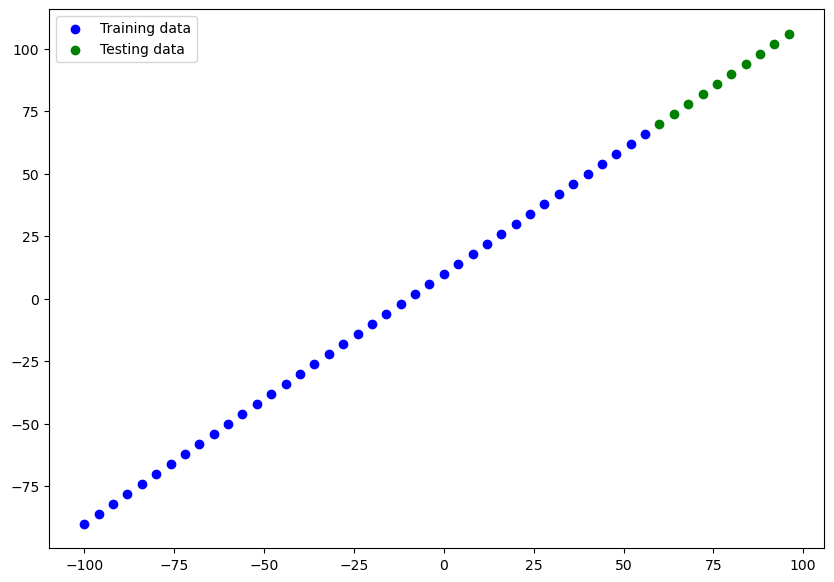

In [21]:
plt.figure(figsize=(10, 7))
# Plot training data in blue
plt.scatter(X_train, y_train, c='b', label='Training data')
# Plot test data in green
plt.scatter(X_test, y_test, c='g', label='Testing data')
# Show the legend
plt.legend();